In [4]:
# # En la documentacion de este notebook podra obtener el detalle de cada columna y procesos hechos aqui.
# Document of this notebook can help you to understand all columns and process do here  

#### Importacion de librerias 
#### Load librarys

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)
import sqlite3


In [2]:
data = pd.read_csv('top10xano.csv', decimal=',', thousands='.', encoding='utf-8')
data2 = pd.read_csv('top5000altime.csv')

# Dataset 1 - TopxYear

In [3]:
#Exploramos el csv data :
#Explore csv data :

data.keys()

Index(['Year', 'Ranking', 'Artist', 'Album', 'Worldwide Sales (Est.)', 'CDs',
       'Tracks', 'Album Length', 'Hours', 'Minutes', 'Seconds', 'Genre'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    320 non-null    int64 
 1   Ranking                 320 non-null    int64 
 2   Artist                  320 non-null    object
 3   Album                   320 non-null    object
 4   Worldwide Sales (Est.)  320 non-null    object
 5   CDs                     320 non-null    int64 
 6   Tracks                  320 non-null    int64 
 7   Album Length            320 non-null    object
 8   Hours                   320 non-null    int64 
 9   Minutes                 320 non-null    int64 
 10  Seconds                 320 non-null    int64 
 11  Genre                   320 non-null    object
dtypes: int64(7), object(5)
memory usage: 30.1+ KB


In [5]:
# Esta recopilacion desde que año cubre?
# Range years? 

ca = data['Year'].sort_values(ascending=True)
ca

145    1990
271    1990
109    1990
115    1990
33     1990
       ... 
13     2021
10     2021
240    2021
114    2021
319    2021
Name: Year, Length: 320, dtype: int64

In [6]:
data['Worldwide Sales (Est.)'].apply(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
315    <class 'str'>
316    <class 'str'>
317    <class 'str'>
318    <class 'str'>
319    <class 'str'>
Name: Worldwide Sales (Est.), Length: 320, dtype: object

In [7]:
# Hay valores faltantes? 
# there are missing values? 
print(data['Worldwide Sales (Est.)'].isnull().sum())

0


In [8]:
# Tenemos que cambiar los valores de WSE dado que existe una inconsistencia en el registro. Object -> int64

In [9]:

# Definir una función que convierta una cadena (str) a flotante(float) manteniendo el formato adecuado.
# Make function to convert str values to float values keeping right data.
def to_float(x):
    try:
        # intentar convertir la cadena a flotante.
        # convert string to float values.
        return float(x)
    except:
        # si falla la conversión, intentar reemplazar el separador de miles y decimales y convertir a flotante
        # if convert fail, try replace comma.
        try:
            x = x.replace(',', '').replace('.', '.')
            return float(x)
        except:
            # si no se puede convertir, dejar el valor original
            return x


In [10]:
# aplicar la función a la columna "Worldwide Sales (Est.)" y sobrescribir los valores originales
# apply the function to the "Worldwide Sales (Est.)" column and overwrite the original values


data['Worldwide Sales (Est.)'] = data['Worldwide Sales (Est.)'].apply(to_float)


In [11]:
data['Worldwide Sales (Est.)']

0       3300000.0
1       3220000.0
2      20000000.0
3       4835000.0
4       7012000.0
          ...    
315     3980000.0
316     3080507.0
317     2947398.0
318     3402981.0
319     2401368.0
Name: Worldwide Sales (Est.), Length: 320, dtype: float64

# Álbums & Artistas

In [12]:
# Ordenamos los albums por la estimacion de ventas.
# Order by sales est.

WSE = data.sort_values(by='Worldwide Sales (Est.)', ascending=False)
WSE.head(20)

,Year,Ranking,Artist,Album,Worldwide Sales (Est.),CDs,Tracks,Album Length,Hours,Minutes,Seconds,Genre
118,1992,1,Whitney Houston,The Bodyguard Soundtrack,45000000.0,1,13,0:57:44,96,5773,3464,Pop
194,1999,1,Backstreet Boys,Milennium,40000000.0,1,12,0:48:11,80,4818,2891,Pop
100,1997,1,Shania Twain,Come On Over,40000000.0,1,16,1:00:06,100,6010,3606,Country
120,1995,1,Alanis Morissette,Jagged Little Pill,33000000.0,1,13,0:57:23,96,5738,3443,Rock
87,1991,1,Metallica,Metallica,33000000.0,1,12,1:02:40,104,6267,3760,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...
287,2000,3,Linkin Park,Hybrid Theory,27000000.0,1,12,0:37:45,63,3775,2265,Rock
257,1999,2,Britney Spears,...Baby One More Time,27000000.0,1,11,0:42:20,71,4233,2540,Pop
30,1991,3,Michael Jackson,Dangerous,27000000.0,1,14,1:17:03,128,7705,4623,Pop
231,2002,1,Norah Jones,Come Away With Me,27000000.0,1,14,0:45:03,75,4505,2703,Pop


In [13]:
# Cambiamos el error de dato de "1" de los Beatles a su valor correcto que es "White álbum"
# Corrected error album of "The Beatles" album from "1" to "White álbum".

data['Album'] = data['Album'].replace('1', 'white Album')
data.to_csv('ETLtop10xano.csv', index=True)

In [14]:
# Filtrar los datos por los álbumes de Michael Jackson
# Filter data by Michael Jackson albums

MJ = data[data['Artist'] == 'Michael Jackson']

# Contar cuántos álbumes de Michael Jackson aparecen en el top por año.
# Count how many Michael Jackson albums appear in the top per year.

MJ_top_albums = MJ.groupby(['Year','Artist', 'Album', 'Ranking', 'Worldwide Sales (Est.)']).size().reset_index(name='AxY')

MJ_top_albums


,Year,Artist,Album,Ranking,Worldwide Sales (Est.),AxY
0,1991,Michael Jackson,Dangerous,3,27000000.0,1
1,1995,Michael Jackson,"History: Past, Present & Future Book I",4,20000000.0,1
2,2003,Michael Jackson,Number Ones,4,9592405.0,1


In [15]:
# Filtrar los datos por los álbumes de Phil Collins.
# Filter data by Phil Collins albums.

PC = data[data['Artist'] == 'Phil Collins']

# Contar cuántos álbumes de Phil Collins aparecen en el top por año.
# Count how many Phil Collins albums appear in the top per year.

PC_top_albums = PC.groupby(['Year','Artist', 'Album', 'Ranking', 'Worldwide Sales (Est.)']).size().reset_index(name='AxY')

PC_top_albums

,Year,Artist,Album,Ranking,Worldwide Sales (Est.),AxY
0,1990,Phil Collins,Serious Hits... Live!,8,9956520.0,1


In [16]:
# Busqueda del album de mayor duracion.
# Album Length research.

# Consultamos al dataset para saber cual es el autor del album de mayor duracion y cual fue su año de lanzamiento.
# We consult the dataset to find out who is the author of the album with the longest duration and what was its release year.

Lenght_music = data[['Year', 'Artist', 'Album', 'Album Length']]

# Filtramos albums de una duracion mayor a '1:20:46'
# Filtering albums what have lenght more than '1:20:46'

Lenght_music_cont = Lenght_music[Lenght_music['Album Length'] > '1:20:46']['Album Length'].value_counts()

# Ordenamos en orden descendente.
# We sort in descending order.

top_15_albums = Lenght_music.sort_values(by='Album Length', ascending=False).head(15)

# Muestra final.
# Final work. 

top_15_albums[['Year', 'Artist', 'Album', 'Album Length']]


,Year,Artist,Album,Album Length
0,2019,Arashi,5x20 All The Best!! 1999-2019,5:04:02
1,2017,Elton John,Diamonds,2:35:47
2,1995,Michael Jackson,"History: Past, Present & Future Book I",2:28:51
3,2015,Broadway Soundtrack,Hamilton,2:22:13
4,2003,Outkast,Speakerboxxx / The Love Below,2:14:39
...,...,...,...,...
10,2021,Morgan Wallen,Dangerous: The Double Album,1:30:53
11,2007,Eagles,Long Road Out Of Eden,1:30:46
12,2018,Drake,Scorpion,1:29:44
13,2021,Drake,Certified Lover Boy,1:26:02


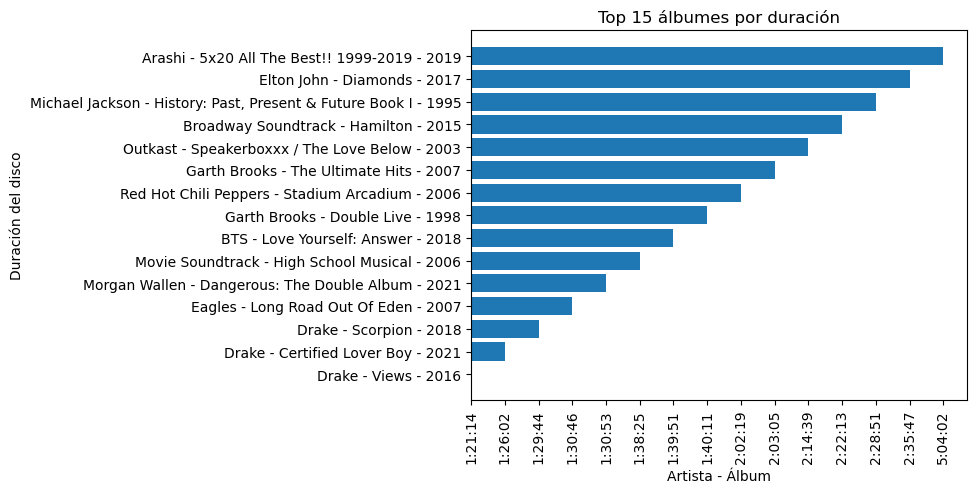

In [17]:
# Ordenar los datos por duración de manera descendente
top_15_albums = top_15_albums.sort_values('Album Length', ascending=True)

# Obtener los datos de duración y artistas
duracion = top_15_albums['Album Length']
artistas = top_15_albums.apply(lambda row: f"{row['Artist']} - {row['Album']} - {row['Year']}", axis=1)



# Crear el gráfico de barras
plt.barh(artistas, duracion)
plt.xlabel('Artista - Álbum')
plt.ylabel('Duración del disco')
plt.title('Top 15 álbumes por duración')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


In [18]:
# Busqueda de los años de mayor recaudacion
# Research the years with the highest collection

# Consultamos al dataset para saber cual es el autor del album de mayor duracion y cual fue su año de lanzamiento.
# We consult the dataset to find out who is the author of the album with the longest duration and what was its release year.

Sales_year = data[['Year', 'Artist', 'Album', 'Worldwide Sales (Est.)','Genre']]

# Filtramos albums de una duracion mayor a '260000.0'
# Filtering albums what have lenght more than '260000.0'

Sales_yearf = Sales_year[Sales_year['Worldwide Sales (Est.)'] > 260000.0]

# Ordenamos en orden descendente.
# We sort in descending order.

Big_sales_year = Sales_yearf.sort_values(by='Worldwide Sales (Est.)', ascending=False).head(15)

# Muestra final.
# Final work.

# Obtener los datos completos (Year, Artist, Album, Worldwide Sales, Genre) para los álbumes con mayores ventas
final_bigsales = Sales_year.loc[Sales_year['Worldwide Sales (Est.)'].isin(Big_sales_year['Worldwide Sales (Est.)'])]

final_bigsales[['Year', 'Artist', 'Album', 'Worldwide Sales (Est.)', 'Genre']]


,Year,Artist,Album,Worldwide Sales (Est.),Genre
22,2000,The Beatles,white Album,32000000.0,Rock
29,1992,ABBA,Gold - Greatest Hits,32000000.0,Pop
43,1997,Celine Dion,Let's Talk About Love,30000000.0,Pop
44,1990,Madonna,The Immaculate Collection,30000000.0,Pop
49,1997,Movie Soundtrack,Titanic,30000000.0,Classical
...,...,...,...,...,...
120,1995,Alanis Morissette,Jagged Little Pill,33000000.0,Rock
194,1999,Backstreet Boys,Milennium,40000000.0,Pop
198,2011,Adele,21,30000000.0,Pop
256,1991,Nirvana,Nevermind,30000000.0,Rock


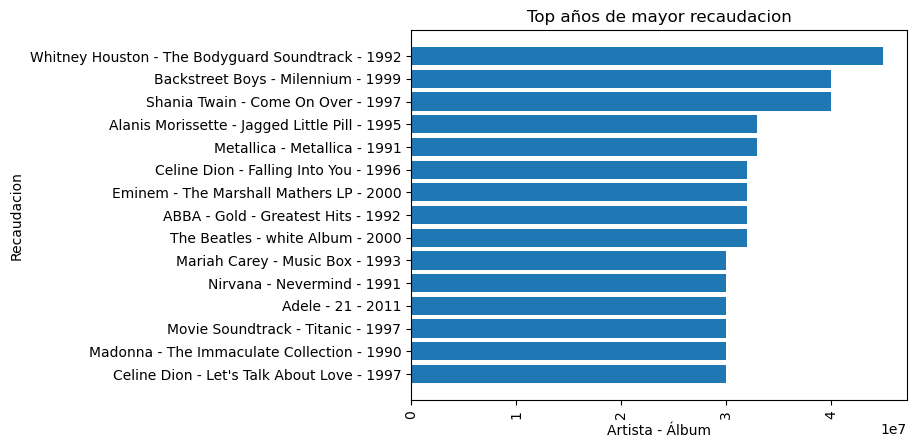

In [19]:

# Grafico de los años de mayor recaudacion
# Graph of the years with the highest collection

# Ordenar los datos por duración de manera descendente
final_bigsales = final_bigsales.sort_values('Worldwide Sales (Est.)', ascending=True)

# Obtener los datos de duración y artistas
duracion = final_bigsales['Worldwide Sales (Est.)']
artistas = final_bigsales.apply(lambda row: f"{row['Artist']} - {row['Album']} - {row['Year']}", axis=1)



# Crear el gráfico de barras
plt.barh(artistas, duracion)
plt.xlabel('Artista - Álbum')
plt.ylabel('Recaudacion')
plt.title('Top años de mayor recaudacion')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


# 2° Dataset
# 5000 ALL TIMES ALBUMS

In [20]:
data2.keys()

Index(['Ranking', 'Album', 'Artist Name', 'Release Date', 'Genres',
       'Descriptors', 'Average Rating', 'Number of Ratings',
       'Number of Reviews'],
      dtype='object')

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            5000 non-null   float64
 1   Album              5000 non-null   object 
 2   Artist Name        5000 non-null   object 
 3   Release Date       5000 non-null   object 
 4   Genres             5000 non-null   object 
 5   Descriptors        4886 non-null   object 
 6   Average Rating     5000 non-null   float64
 7   Number of Ratings  5000 non-null   object 
 8   Number of Reviews  5000 non-null   int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 351.7+ KB


In [22]:
#### Podemos observar que es un dataset con mas datos. 
### Biggest dataset than before.

# Esta recopilacion desde que año cubre? 
# What year cover this dataset? 

rd = data2['Release Date'].sort_values(ascending=True)
rd.tail(2000)

1547    28 October 1989
1546    28 October 1997
3304    28 October 2002
961     28 October 2002
2023    28 October 2002
             ...       
967      September 2002
1975     September 2009
2100     September 2009
4031     September 2012
2578     September 2017
Name: Release Date, Length: 2000, dtype: object

In [23]:
#Al parecer tenemos registros desde 1966 y por ultimo 2017, veamos que artistas se encuenrtan en este ATH5000
# This dataset cover since 1966 to 2017, let's look who artist are in this ATH5000


#Top 10

DS_top_albums = data2.sort_values(by='Ranking', ascending=True)
DS_top_albums.head(10)

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379
5,6.0,Loveless,My Bloody Valentine,4 November 1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,"49,887",1223
6,7.0,The Dark Side of the Moon,Pink Floyd,23 March 1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,"57,622",1549
7,8.0,Abbey Road,The Beatles,26 September 1969,Pop Rock,"melodic, warm, male vocals, bittersweet, summe...",4.25,"44,544",961
8,9.0,The Velvet Underground & Nico,The Velvet Underground & Nico,12 March 1967,"Art Rock, Experimental Rock","drugs, sexual, raw, urban, noisy, nihilistic, ...",4.23,"45,570",929
9,10.0,The Rise and Fall of Ziggy Stardust and the Sp...,David Bowie,16 June 1972,"Glam Rock, Pop Rock","science fiction, melodic, anthemic, concept al...",4.26,"39,501",721


In [24]:
# Final de la lista
# Tail of list

DS_top_albums.tail(10)

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
4990,4991.0,The Time of the Oath,Helloween,5 March 1996,Power Metal,"energetic, melodic, male vocals, ..., heavy",3.65,"1,542",43
4991,4992.0,I Am,"Earth, Wind & Fire",9 June 1979,"Disco, Funk","happy, summer, party, energetic, uplifting, lu...",3.68,"1,108",22
4992,4993.0,現実を超えて (Genjitsu o koete),t e l e p a t h テレパシー能力者,26 June 2014,Vaporwave,"meditative, nocturnal, sampling, atmospheric, ...",3.67,814,13
4993,4994.0,Bring the Family,John Hiatt,May 1987,"Singer/Songwriter, Roots Rock, Americana","love, lethargic, lonely, existential, melodic,...",3.68,727,37
4994,4995.0,Passion,Catharsis,1999,"Crust Punk, Metalcore","male vocals, anarchism, aggressive, angry, hea...",3.65,616,6
4995,4996.0,Gracious!,Gracious,17 July 1970,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32
4996,4997.0,Knights of the Cross,Grave Digger,18 May 1998,"Power Metal, Heavy Metal","history, male vocals, heavy, concept album, an...",3.67,562,11
4997,4998.0,(Listen For) The Rag and Bone Man,And Also the Trees,12 November 2007,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15
4998,4999.0,Hymnen für elektronische und konkrete Klänge,Studio für elektronische Musik des Westdeutsch...,1969,"Musique concrète, Modern Classical, Electronic","avant-garde, sampling, dense, complex, scary, ...",3.65,536,11
4999,5000.0,Adventures in Paradise,Minnie Riperton,22 May 1975,"Smooth Soul, Pop Soul","lush, female vocals, romantic, uplifting, summ...",3.69,490,14


In [25]:
# Cuales son los 5 albums con mas reseñas?
# Who are 5 albums with most reviews?

Review = data2.sort_values(by='Number of Reviews', ascending=False)
Review.head(5)

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
6,7.0,The Dark Side of the Moon,Pink Floyd,23 March 1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,"57,622",1549
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
5,6.0,Loveless,My Bloody Valentine,4 November 1991,"Shoegaze, Noise Pop","noisy, ethereal, atmospheric, romantic, dense,...",4.24,"49,887",1223
10,11.0,Revolver,The Beatles,5 August 1966,"Pop Rock, Psychedelic Pop","psychedelic, melodic, male vocals, drugs, ecle...",4.23,"43,178",1160
30,31.0,The Beatles [White Album],The Beatles,22 November 1968,"Pop Rock, Rock","eclectic, melodic, playful, male vocals, quirk...",4.14,"35,545",1085


In [26]:
# Cuantos discos de 'The Beatles' aparecen en esta seleccion? 
# How many albums of 'The Beatles' are in this dataset?

SA = data2[data2['Artist Name'] == 'The Beatles']
SA

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
7,8.0,Abbey Road,The Beatles,26 September 1969,Pop Rock,"melodic, warm, male vocals, bittersweet, summe...",4.25,"44,544",961
10,11.0,Revolver,The Beatles,5 August 1966,"Pop Rock, Psychedelic Pop","psychedelic, melodic, male vocals, drugs, ecle...",4.23,"43,178",1160
23,24.0,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,1 June 1967,"Psychedelic Pop, Pop Rock","psychedelic, playful, melodic, male vocals, wa...",4.13,"43,576",863
30,31.0,The Beatles [White Album],The Beatles,22 November 1968,"Pop Rock, Rock","eclectic, melodic, playful, male vocals, quirk...",4.14,"35,545",1085
72,73.0,Rubber Soul,The Beatles,3 December 1965,Pop Rock,"melodic, love, male vocals, bittersweet, roman...",4.03,"33,508",721
78,79.0,Magical Mystery Tour,The Beatles,27 November 1967,"Psychedelic Pop, Pop Rock","psychedelic, melodic, playful, surreal, male v...",4.06,"27,318",560
1894,1895.0,Help!,The Beatles,6 August 1965,Pop Rock,"bittersweet, melodic, love, male vocals, roman...",3.67,"20,697",380
1957,1958.0,Love,The Beatles,26 November 2006,"Pop Rock, Mashup, Psychedelic Rock","melodic, male vocals, mashup, psychedelic, hyp...",3.75,"2,309",142
2155,2156.0,A Hard Day's Night,The Beatles,10 July 1964,"Merseybeat, Pop Rock","love, romantic, melodic, male vocals, energeti...",3.65,"20,388",462
4818,4819.0,Let It Be,The Beatles,18 May 1970,Pop Rock,"male vocals, melodic, warm, bittersweet, energ...",3.55,"21,363",414


In [27]:
# Cuantos discos de 'Pink Floyd' aparecen en esta seleccion? 
# How many albums of 'Pink Floyd' are in this dataset?

SA2 = data2[data2['Artist Name'] == 'Pink Floyd']
SA2

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
6,7.0,The Dark Side of the Moon,Pink Floyd,23 March 1973,"Art Rock, Progressive Rock","philosophical, atmospheric, introspective, exi...",4.20,"57,622",1549
32,33.0,Animals,Pink Floyd,21 January 1977,"Progressive Rock, Art Rock","political, pessimistic, philosophical, sarcast...",4.13,"36,462",695
138,139.0,Meddle,Pink Floyd,5 November 1971,Progressive Rock,"mellow, psychedelic, atmospheric, mysterious, ...",3.96,"27,730",531
270,271.0,The Piper at the Gates of Dawn,Pink Floyd,4 August 1967,"Psychedelic Rock, Psychedelic Pop","psychedelic, drugs, fantasy, surreal, playful,...",3.86,"28,446",691
288,289.0,The Wall,Pink Floyd,30 November 1979,"Rock Opera, Art Rock","misanthropic, rock opera, lonely, concept albu...",3.80,"36,827",747
3004,3005.0,A Saucerful of Secrets,Pink Floyd,29 June 1968,Psychedelic Rock,"psychedelic, surreal, mysterious, space, atmos...",3.64,"17,144",316
3656,3657.0,Atom Heart Mother,Pink Floyd,2 October 1970,"Progressive Rock, Psychedelic Rock","psychedelic, peaceful, progressive, suite, mal...",3.60,"18,989",364


In [28]:
# tops albums 1992

R1992D = data2['Release Date'].str.contains('1992')
selected_1992 = data2[R1992D]
selected_1992

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
90,91.0,Selected Ambient Works 85-92,Aphex Twin,9 November 1992,"Ambient Techno, IDM","atmospheric, ethereal, futuristic, instrumenta...",4.03,"27,921",300
164,165.0,Rage Against the Machine,Rage Against the Machine,10 November 1992,"Rap Metal, Alternative Metal","political, protest, aggressive, angry, rebelli...",3.94,"22,122",439
213,214.0,Dirt,Alice in Chains,29 September 1992,"Grunge, Alternative Metal","drugs, heavy, depressive, pessimistic, angry, ...",3.93,"18,181",452
242,243.0,Bone Machine,Tom Waits,8 September 1992,"Singer/Songwriter, Experimental Rock","dark, raw, nocturnal, death, manic, ominous, e...",3.98,"9,452",171
283,284.0,Twin Peaks: Fire Walk With Me,Angelo Badalamenti,11 August 1992,"Film Score, Dark Jazz","nocturnal, dark, atmospheric, surreal, mysteri...",4.01,"2,939",16
...,...,...,...,...,...,...,...,...,...
4423,4424.0,Propeller,Guided by Voices,1992,"Lo-Fi / Slacker Rock, Indie Rock","lo-fi, melodic, noisy, raw, bittersweet, male ...",3.68,"2,008",48
4641,4642.0,The Predator,Ice Cube,17 November 1992,"West Coast Hip Hop, Gangsta Rap, Political Hip...","crime, political, violence, urban, angry, male...",3.66,"2,711",56
4665,4666.0,Megalázottak és megszomorítottak,After Crying,1992,"Progressive Rock, Symphonic Prog","nocturnal, poetic, progressive, dark, mellow, ...",3.69,496,16
4835,4836.0,Music to Driveby,Comptons Most Wanted,29 September 1992,"Gangsta Rap, West Coast Hip Hop","urban, sampling, male vocals, crime, lethargic...",3.68,753,20


In [29]:
# Top albums 2002 

R2002D = data2['Release Date'].str.contains('2002')
selected_2002 = data2[R2002D]
selected_2002

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
149,150.0,Turn On the Bright Lights,Interpol,20 August 2002,Post-Punk Revival,"urban, melancholic, atmospheric, anxious, noct...",3.95,"26,724",490
187,188.0,Songs for the Deaf,Queens of the Stone Age,27 August 2002,"Stoner Rock, Alternative Rock","desert, energetic, concept album, male vocals,...",3.94,"22,755",346
204,205.0,Geogaddi,Boards of Canada,18 February 2002,IDM,"mysterious, psychedelic, atmospheric, ominous,...",3.96,"16,637",191
220,221.0,Yankee Hotel Foxtrot,Wilco,23 April 2002,Indie Rock,"melancholic, bittersweet, male vocals, poetic,...",3.92,"21,466",371
244,245.0,Cowboy Bebop CD-Box,Yoko Kanno / Seatbelts,21 June 2002,"Television Music, Jazz, Pop","eclectic, male vocals, melodic, female vocals,...",4.03,594,6
...,...,...,...,...,...,...,...,...,...
4888,4889.0,The Remote Viewer,Coil,May 2002,"Tribal Ambient, Experimental, Electronic","atmospheric, instrumental, mysterious, hypnoti...",3.66,"1,142",13
4895,4896.0,The Sullen Sulcus,Mourning Beloveth,15 December 2002,Death Doom Metal,"male vocals, melancholic, melodic, depressive,...",3.68,490,5
4908,4909.0,Trust,Low,21 October 2002,Slowcore,"sad, lethargic, sombre, melancholic, atmospher...",3.67,"2,255",37
4982,4983.0,Demons Dance Alone,The Residents,May 2002,"Art Pop, Experimental Rock","male vocals, female vocals, introspective, mel...",3.67,651,15


In [30]:
# Tops albums 2012 

R2012D = data2['Release Date'].str.contains('2012')
selected_2012 = data2[R2012D]
selected_2012

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
16,17.0,"good kid, m.A.A.d city",Kendrick Lamar,22 October 2012,"West Coast Hip Hop, Conscious Hip Hop","urban, crime, concept album, conscious, intros...",4.20,"38,939",315
61,62.0,The Money Store,Death Grips,24 April 2012,"Industrial Hip Hop, Hardcore Hip Hop, Experime...","aggressive, manic, energetic, angry, noisy, ni...",4.02,"36,403",311
234,235.0,The Seer,Swans,28 August 2012,"Experimental Rock, Post-Rock","apocalyptic, repetitive, ominous, epic, dark, ...",3.93,"16,591",253
470,471.0,channel ORANGE,Frank Ocean,10 July 2012,"Alternative R&B, Contemporary R&B","romantic, sexual, lonely, warm, summer, LGBT, ...",3.79,"24,446",182
471,472.0,Mista Thug Isolation,Lil Ugly Mane,11 February 2012,"Memphis Rap, Southern Hip Hop","drugs, misanthropic, vulgar, dark, crime, humo...",3.87,"10,944",62
...,...,...,...,...,...,...,...,...,...
4289,4290.0,The Master,Jonny Greenwood,11 September 2012,"Film Score, Modern Classical, Orchestral","mysterious, anxious, atmospheric, orchestral, ...",3.71,824,9
4293,4294.0,Journey,Austin Wintory,10 April 2012,"Video Game Music, Ambient, Cinematic Classical","desert, peaceful, meditative, ethereal, atmosp...",3.70,601,7
4338,4339.0,Trick,Alex G,6 November 2012,"Lo-Fi / Slacker Rock, Singer/Songwriter, Bedro...","melodic, lo-fi, lonely, calm, bittersweet, mal...",3.67,"3,311",13
4462,4463.0,Monomania,Car Seat Headrest,1 August 2012,"Lo-Fi / Slacker Rock, Singer/Songwriter","breakup, lo-fi, LGBT, angry, bittersweet, lone...",3.67,"2,409",17


In [31]:
# Vemos menor cantidad de seleccion de albums post 2000.
# We can see less selection of album after year 2000

In [32]:
# Creamos una variable en donde se convierta nuestra columna 'Release Date' en una fecha 

data2['Release Date'] = pd.to_datetime(data2['Release Date'], format='%d %B %Y', errors='coerce')

data2['Release Date']

0      1997-06-16
1      1975-09-12
2      1969-10-10
3      2000-10-03
4      2015-03-15
          ...    
4995   1970-07-17
4996   1998-05-18
4997   2007-11-12
4998          NaT
4999   1975-05-22
Name: Release Date, Length: 5000, dtype: datetime64[ns]

In [33]:
# Creamos una variable en donde se convierta nuestra columna 'Release Date' por decadas. 

bin_edges = [i for i in range(1957, 2019, 10)]
bin_labels = [f"{i}-{i+9}" for i in range(1957, 2017, 10)]
data2['Decade'] = pd.cut(data2['Release Date'].dt.year, bins=bin_edges, labels=bin_labels)


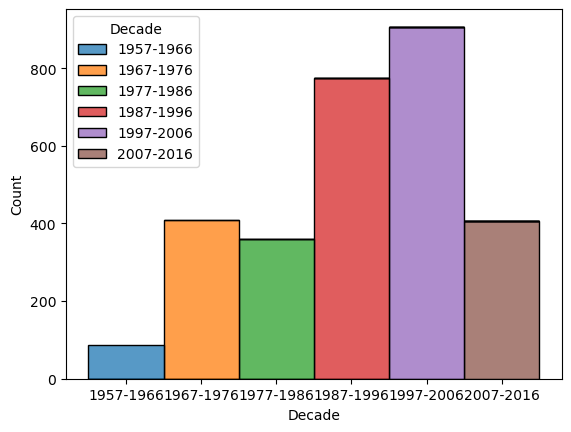

In [34]:
#Grafico x cantidad de albums por decada : 
sns.histplot(data=data2, x='Decade', hue='Decade', multiple='stack')
plt.show()

# Géneros 

In [35]:
data2['Genres'].value_counts()

Progressive Rock                                          108
Hard Bop                                                   97
Death Metal                                                62
Hard Rock                                                  55
Thrash Metal                                               53
                                                         ... 
Nueva canción española, Singer/Songwriter, Baroque Pop      1
Pop Rock, Mashup, Psychedelic Rock                          1
Noise Pop, J-Rock                                           1
Ambient, Ambient Techno                                     1
Musique concrète, Modern Classical, Electronic              1
Name: Genres, Length: 2168, dtype: int64

In [36]:
#ETL and group ;

generos_grandes = data2['Genres'].value_counts()

# Filtrar los valores que tienen al menos 10 o más repeticiones
generos_abarcativo = generos_grandes[generos_grandes >= 10]

# Obtener los géneros correspondientes a los valores filtrados
generos_abarcativo = generos_abarcativo.index

# Filtrar el DataFrame original por los géneros seleccionados
df_filtrado = data2[data2['Genres'].isin(generos_abarcativo)]

# Obtener los conteos de cada género en el DataFrame filtrado
conteo_generos = df_filtrado['Genres'].value_counts()

# Calcular los porcentajes de cada género
porcentajes_generos = conteo_generos / conteo_generos.sum() * 100

porcentajes_generos


Progressive Rock                      6.945338
Hard Bop                              6.237942
Death Metal                           3.987138
Hard Rock                             3.536977
Thrash Metal                          3.408360
                                        ...   
Grindcore                             0.643087
Slowcore                              0.643087
Singer/Songwriter, Indie Folk         0.643087
Jangle Pop, Indie Pop                 0.643087
Progressive Rock, Psychedelic Rock    0.643087
Name: Genres, Length: 67, dtype: float64

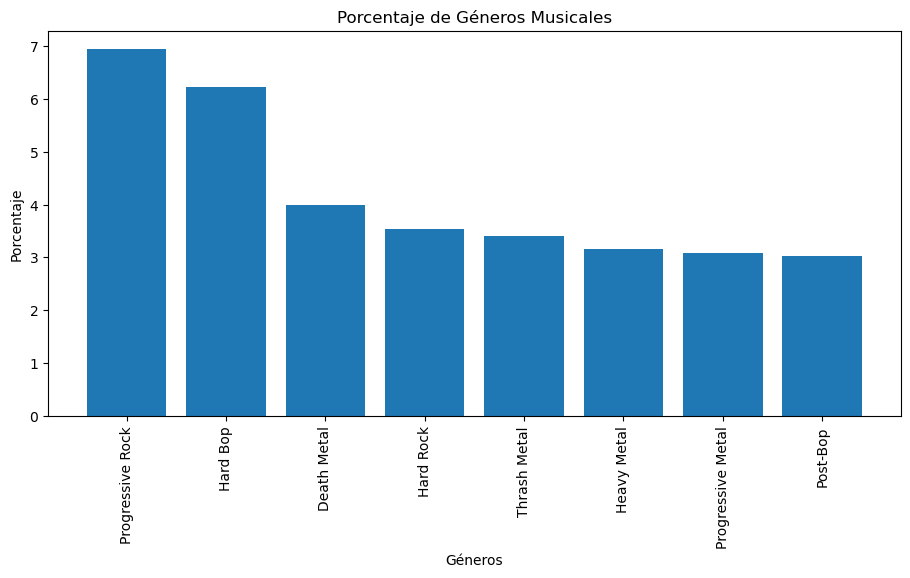

In [37]:
# Filtrar los porcentajes de géneros mayores a un valor específico (por ejemplo, 3%)
# Filter gender percentages greater than a specific value (for example, 3%)
porcentajes_filtrados = porcentajes_generos[porcentajes_generos > 3]

# Crear el gráfico de barras
# Create bars graphic

plt.figure(figsize=(11, 5))
plt.bar(porcentajes_filtrados.index, porcentajes_filtrados)

# Personalizar el gráfico
# Personalize graph

plt.xlabel('Géneros')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Géneros Musicales')
plt.xticks(rotation=90)

# Mostrar el gráfico
# Show graph

plt.show()

### Un poco de SQL
### A little of SQL

In [57]:

# connect to the database
conn = sqlite3.connect('musicseleccion.db')

# create a cursor object
c = conn.cursor()

# create a table
c.execute('''CREATE TABLE Musicians
             (id INT PRIMARY KEY NOT NULL,
              name TEXT NOT NULL,
              age INT NOT NULL)''')

# save the changes
conn.commit()



OperationalError: table Musicians already exists

In [65]:
# connect to the database
conn = sqlite3.connect('musicseleccion.db')

# create a cursor object
c = conn.cursor()

# insert data into the table
c.execute("INSERT INTO Musicians (id, name, age) VALUES (1, 'Michael Jackson', 50)")
c.execute("INSERT INTO Musicians (id, name, age) VALUES (2, 'Kendrick Lamar', 36)")
c.execute("INSERT INTO Musicians (id, name, age) VALUES (3, 'Kendrick Lamar', 35)")
c.execute("INSERT INTO Musicians (id, name, age) VALUES (4, 'Austin Wintory', 36)")


# save the changes
conn.commit()


In [66]:

# select data from the table
c.execute("SELECT * FROM Musicians")

# fetch all the records
records = c.fetchall()

# print the records
for record in records:
    print(record)


(1, 'Michael Jackson', 50)
(2, 'Kendrick Lamar', 36)
(3, 'Kendrick Lamar', 35)
(4, 'Austin Wintory', 36)


In [68]:

# select data from the table
c.execute("SELECT * FROM Musicians")

# fetch all the records
records = c.fetchall()

# print the records
for record in records:
    print(record)



(1, 'Michael Jackson', 50)
(2, 'Kendrick Lamar', 36)
(3, 'Kendrick Lamar', 35)
(4, 'Austin Wintory', 36)


In [71]:

# connect to the database
conn = sqlite3.connect('musicseleccion.db')

# create a cursor object
c = conn.cursor()

# update data in the table
c.execute("UPDATE Musicians SET age = 35 WHERE name = 'Kendrick Lamar'")

# Guardamos cambios
# Save the changes
conn.commit()

# Seleccionamos data de nuestra tabla
# Select data from the table
c.execute("SELECT * FROM Musicians")



# Obtenemos todos los registros
# fetch all the records
records = c.fetchall()

# print the records
for record in records:
    print(record)


(1, 'Michael Jackson', 50)
(2, 'Kendrick Lamar', 35)
(3, 'Kendrick Lamar', 35)
(4, 'Austin Wintory', 36)


In [72]:
# Actualizamos data de nuestra tabla
# Update data from the table
c.execute("UPDATE Musicians SET age = 36 WHERE name = 'Kendrick Lamar'")
c.execute("UPDATE Musicians SET age = 64 WHERE name = 'Michael Jackson'")

# Guardamos cambios
# Save the changes
conn.commit()


# Seleccionamos data de nuestra tabla
# Select data from the table
c.execute("SELECT * FROM Musicians")

# Obtenemos todos los registros
# fetch all the records
records = c.fetchall()

# print the records
for record in records:
    print(record)


(1, 'Michael Jackson', 64)
(2, 'Kendrick Lamar', 36)
(3, 'Kendrick Lamar', 36)
(4, 'Austin Wintory', 36)


In [73]:
# Borramos data de nuestra tabla
# Delete data from the table
c.execute("DELETE FROM Musicians WHERE name = 'Austin Wintory'")

# Guardamos cambios
# Save the changes
conn.commit()

# Seleccionamos data de nuestra tabla
# Select data from the table
c.execute("SELECT * FROM Musicians")

# Obtenemos todos los registros
# Fetch all the records
records = c.fetchall()

# print the records
for record in records:
    print(record)


(1, 'Michael Jackson', 64)
(2, 'Kendrick Lamar', 36)
(3, 'Kendrick Lamar', 36)
